In [16]:
import cv2
import numpy as np
import skimage.exposure
from matplotlib import pyplot as plt


In [17]:
# load image
img = cv2.imread('foreground/fg-1.jpg')

# convert to LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)


In [18]:
# extract A channel
A = lab[:, :, 1]


In [19]:
# threshold A channel
thresh = cv2.threshold(A, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]


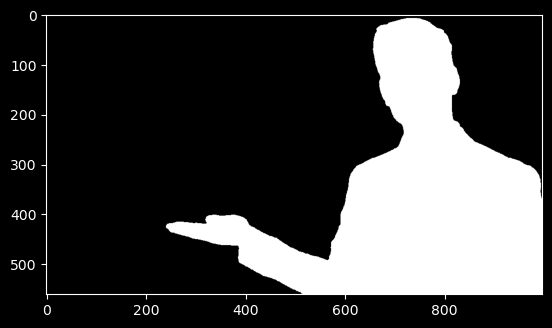

In [31]:
plt.imshow(thresh, cmap='gray')

In [20]:
# blur threshold image
# blur = cv2.GaussianBlur(thresh, (0, 0), sigmaX=1,
#                         sigmaY=1, borderType=cv2.BORDER_DEFAULT)

In [21]:
# blur

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [22]:
# stretch so that 255 -> 255 and 127.5 -> 0
# mask = skimage.exposure.rescale_intensity(blur, in_range=(
#     127.5, 255), out_range=(0, 255)).astype(np.uint8)


In [23]:
# mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [24]:
# add mask to image as alpha channel
# result = img.copy()
# result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
# result[:, :, 3] = mask


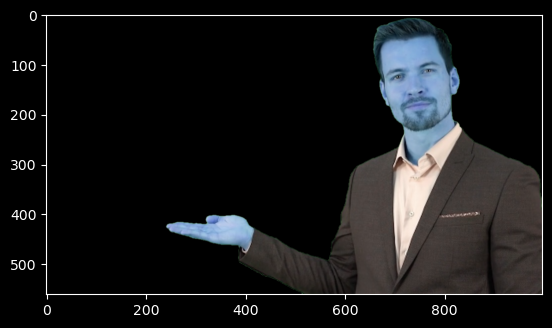

In [25]:
# plt.imshow(result)

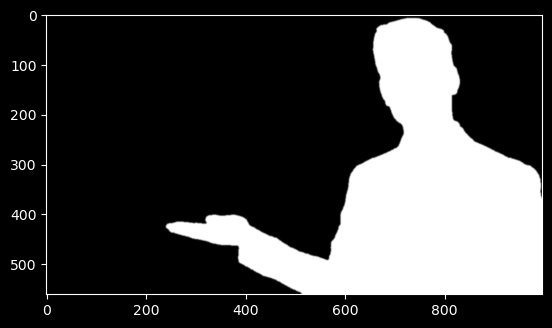

In [26]:
# plt.imshow(blur,cmap='gray')

In [27]:
bg = cv2.imread('background/bg-1.jpg')
bg = cv2.resize(bg, (img.shape[1], img.shape[0]),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)

In [28]:
newImg = img.copy()

In [29]:
newImg[thresh == 0] = bg[thresh == 0]


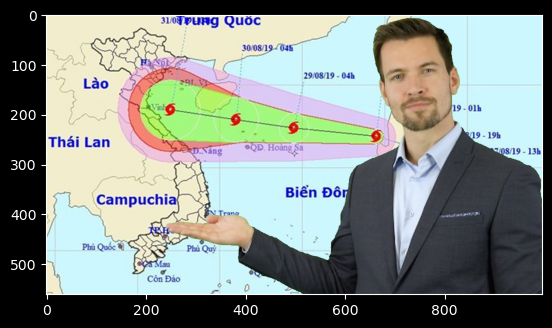

In [30]:
newImg = cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB)
plt.imshow(newImg)